### Learning from Big Data: Module 1 - Final Assignment





# Relationship between Tweets sentiment and Stock price


Author: Semir Arabo

Date:   09/22/2024


.


# Data Sources:


**UGC  dataset** (Tweets about Nvidia) was retrieved from [here](https://www.kaggle.com/datasets/soheiltehranipour/100k-nvidia-tweets) and uploaded as "Nvidia-Tweets.csv"

**Corpus** used for Lexicon creation (a dataset of labaled Tweets) was retrieved from [here](https://www.researchgate.net/figure/Sample-data-from-Sentiment-140-dataset_fig1_369319715) and uploaded as "training.160000000.processed.noemoticon.csv"

**Financial data** (Nvidia stock price) were retrieved from Yahoo finance using "yfinance" library




The proliferation of user-generated content on social media platforms like Twitter has opened up new avenues for understanding public sentiment and its potential impact on financial markets. This project investigates the intricate relationship between sentiment expressed in tweets and stock price fluctuations, focusing on Nvidia as a case study. We leverage Natural Language Processing (NLP) techniques, specifically a Naive Bayes Classifier (NBC), to analyze tweets related to Nvidia and extract quantifiable sentiment scores.

The NBC model, trained on a labeled corpus of tweets, enables us to classify tweets into distinct sentiment categories, providing a nuanced understanding of public opinion towards Nvidia. This granular sentiment analysis allows us to investigate the correlation between sentiment trends and stock price movements. By examining historical stock price data from Yahoo Finance and aligning it with the temporal distribution of sentiment scores, we aim to uncover statistically significant relationships and explore the predictive capacity of public sentiment derived from Twitter data. This endeavor requires careful data preprocessing, feature engineering, and rigorous statistical analysis to establish a robust framework for understanding the interplay between social media sentiment and market dynamics.

In [227]:
import pandas as pd

df = pd.read_csv('Nvidia-Tweets.csv')

print(df.head())
print(df.describe(include='object'))

column_names = df.columns
print(column_names)

  Unnamed: 0                   Datetime      Tweet Id  \
0          0  2023-02-06 10:07:17+00:00  1.622537e+18   
1          1  2023-02-06 10:06:30+00:00  1.622537e+18   
2          2  2023-02-06 10:06:08+00:00  1.622537e+18   
3          3  2023-02-06 10:05:43+00:00  1.622537e+18   
4          4  2023-02-06 10:03:49+00:00  1.622537e+18   

                                                Text        Username  
0  $nvda  Top analyst price target for next week ...  RyderJohnston6  
1  $nvda Top analyst price target for this week.🔗...        k_mebane  
2  $nvda Top analyst price target for next week.....    RonaldBevan2  
3  $NVDA Top analyst target price for next week🚀 ...       Eva077777  
4  $rsls rebound 🚨🚨🚀🚀🚀\n————\n\n$EDSA\n$KODK\n$DO...  MrBlackTrading  
                         Unnamed: 0   Datetime    Text        Username
count                        100847     100369  100001           99633
unique                       100454      98265   91090            8684
top     Via https:

In [228]:
#cleaning
df = df.drop(columns = ['Unnamed: 0', 'Tweet Id', 'Username'], axis=1)
df.dropna(inplace=True)
df.rename(columns={'Datetime': 'Time'}, inplace=True)
df.drop_duplicates(inplace=True)

print(df.head())
print(df.info())



                        Time  \
0  2023-02-06 10:07:17+00:00   
1  2023-02-06 10:06:30+00:00   
2  2023-02-06 10:06:08+00:00   
3  2023-02-06 10:05:43+00:00   
4  2023-02-06 10:03:49+00:00   

                                                Text  
0  $nvda  Top analyst price target for next week ...  
1  $nvda Top analyst price target for this week.🔗...  
2  $nvda Top analyst price target for next week.....  
3  $NVDA Top analyst target price for next week🚀 ...  
4  $rsls rebound 🚨🚨🚀🚀🚀\n————\n\n$EDSA\n$KODK\n$DO...  
<class 'pandas.core.frame.DataFrame'>
Index: 100001 entries, 0 to 100846
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Time    100001 non-null  object
 1   Text    100001 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


In [258]:
#drop advertisments

ad_keywords = ['Top analyst price target for',"http", 'Limited offer', "Click here", "Visit our website", "Discover more"]
for keyword in ad_keywords:
    df = df[~df['Text'].str.contains(keyword, case = False)]

df = df.reset_index(drop=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18899 entries, 0 to 18898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    18899 non-null  object
 1   Text    18899 non-null  object
dtypes: object(2)
memory usage: 295.4+ KB
None


In [231]:
#Date range
print("Min:",df['Time'].min(), "Max:",df['Time'].max())

Min: 2022-11-21 14:30:16+00:00 Max: 2023-02-06 10:06:30+00:00


In [59]:
#constructing the stock market change variable
import yfinance as yf
import numpy as np

ticker_symbol = 'NVDA'
start_date = '2022-11-20'
end_date = '2023-02-07'

nvidia_data = yf.download(ticker_symbol, start=start_date, end=end_date)

nvidia_prices = nvidia_data[['Open', 'Adj Close']]


nvidia_prices['Per Change'] = 100*(nvidia_prices['Open'] / nvidia_prices['Adj Close'].shift(1) - 1)
nvidia_prices['Change'] = np.where(nvidia_prices['Per Change'] > 2, 1,
                                    np.where(nvidia_prices['Per Change'] < -2, -1, 0))
print(nvidia_prices)

[*********************100%***********************]  1 of 1 completed

                 Open  Adj Close  Per Change  Change
Date                                                
2022-11-21  15.147000  15.303007         NaN       0
2022-11-22  15.328000  16.023348    0.163320       0
2022-11-23  16.098000  16.503908    0.465893       0
2022-11-25  16.318001  16.255136   -1.126444       0
2022-11-28  16.025999  15.812541   -1.409631       0
2022-11-29  15.827000  15.624713    0.091438       0
2022-11-30  15.697000  16.911865    0.462643       0
2022-12-01  16.999001  17.123728    0.515232       0
2022-12-02  16.659000  16.864895   -2.713938      -1
2022-12-05  16.679001  16.599072   -1.102254       0
2022-12-06  16.530001  15.976481   -0.416113       0
2022-12-07  15.772000  16.109394   -1.279888       0
2022-12-08  16.273001  17.157705    1.015598       0
2022-12-09  17.160000  16.989815    0.013373       0
2022-12-12  17.037001  17.523462    0.277731       0
2022-12-13  18.531000  18.060110    5.749651       1
2022-12-14  17.987000  17.662373   -0.404818  


<ipython-input-59-cc72a162cf1a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_prices['Per Change'] = 100*(nvidia_prices['Open'] / nvidia_prices['Adj Close'].shift(1) - 1)
<ipython-input-59-cc72a162cf1a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_prices['Change'] = np.where(nvidia_prices['Per Change'] > 2, 1,


In [287]:
positive_days = nvidia_prices[nvidia_prices['Change'] == 1].index
negative_days = nvidia_prices[nvidia_prices['Change'] == -1].index
neutral_days = nvidia_prices[nvidia_prices['Change'] == 0].sample(n=4).index
print(positive_days)
print(negative_days)
print(neutral_days)

DatetimeIndex(['2022-12-13', '2022-12-29', '2023-01-09', '2023-01-26'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2022-12-02', '2022-12-15', '2022-12-22', '2023-02-03'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2022-11-28', '2022-11-21', '2022-11-23', '2023-01-13'], dtype='datetime64[ns]', name='Date', freq=None)


In [289]:
#Choose 300 tweets from time when NASDAQ Stock market is closed
from datetime import datetime, timedelta

during_positive_tweets = []
for day in positive_days:
    day_str = day.strftime('%Y-%m-%d')
    next_day_str = (day + timedelta(days=1)).strftime('%Y-%m-%d')

    for index, row in df.iterrows():
        tweet_time = datetime.strptime(row['Time'], '%Y-%m-%d %H:%M:%S%z')
        if (tweet_time.strftime('%Y-%m-%d') == day_str and tweet_time.hour < 9 and tweet_time.minute < 30) or \
           (tweet_time.strftime('%Y-%m-%d') == next_day_str and tweet_time.hour >= 16 and tweet_time.minute > 0):
            during_positive_tweets.append(row)

during_positive_tweets = pd.DataFrame(during_positive_tweets)
print(during_positive_tweets)

                            Time  \
14099  2022-12-14 23:56:53+00:00   
14100  2022-12-14 23:54:33+00:00   
14101  2022-12-14 23:51:37+00:00   
14102  2022-12-14 23:50:45+00:00   
14103  2022-12-14 23:47:07+00:00   
...                          ...   
3833   2023-01-26 00:16:35+00:00   
3834   2023-01-26 00:09:19+00:00   
3835   2023-01-26 00:02:38+00:00   
3836   2023-01-26 00:02:09+00:00   
3837   2023-01-26 00:01:44+00:00   

                                                    Text  
14099  $TSLA &amp; $NVDA …….\n\nSee you at $120/$130....  
14100  @mikefichera @MrTopStep I hear ya. \n\nBear ma...  
14101                  @StockMKTNewz Time to short $nvda  
14102  Nvidia CEO Jensen Huang just triggered employe...  
14103  @mikefichera @MrTopStep $NVDA powers a ton of ...  
...                                                  ...  
3833   Elon Musk는 Tesla $TSLA 'DOJO 슈퍼컴퓨터'가 올해 $NVDA ...  
3834                         $NVDA get excited over $200  
3835   @AjTrader7 AJ- you called mar

In [290]:
during_negative_tweets = []
for day in negative_days:
    day_str = day.strftime('%Y-%m-%d')
    next_day_str = (day + timedelta(days=1)).strftime('%Y-%m-%d')

    for index, row in df.iterrows():
        tweet_time = datetime.strptime(row['Time'], '%Y-%m-%d %H:%M:%S%z')
        if (tweet_time.strftime('%Y-%m-%d') == day_str and tweet_time.hour < 9 and tweet_time.minute < 30) or \
           (tweet_time.strftime('%Y-%m-%d') == next_day_str and tweet_time.hour >= 16 and tweet_time.minute > 0):
            during_negative_tweets.append(row)

during_negative_tweets = pd.DataFrame(during_negative_tweets)

In [291]:
during_neutral_tweets = []
for day in neutral_days:
    day_str = day.strftime('%Y-%m-%d')
    next_day_str = (day + timedelta(days=1)).strftime('%Y-%m-%d')

    for index, row in df.iterrows():
        tweet_time = datetime.strptime(row['Time'], '%Y-%m-%d %H:%M:%S%z')
        if (tweet_time.strftime('%Y-%m-%d') == day_str and tweet_time.hour < 9 and tweet_time.minute < 30) or \
           (tweet_time.strftime('%Y-%m-%d') == next_day_str and tweet_time.hour >= 16 and tweet_time.minute > 0):
            during_neutral_tweets.append(row)

during_neutral_tweets = pd.DataFrame(during_neutral_tweets)

In [293]:

all_tweets = pd.concat([during_positive_tweets, during_neutral_tweets, during_negative_tweets])


all_tweets['Market Sentiment'] = 0
all_tweets.loc[all_tweets.index.isin(during_positive_tweets.index), 'Market Sentiment'] = 1
all_tweets.loc[all_tweets.index.isin(during_negative_tweets.index), 'Market Sentiment'] = -1

all_tweets = all_tweets.sample(n=300)
all_tweets = all_tweets.reset_index(drop=True)
print(all_tweets)

                          Time  \
0    2022-12-30 21:28:22+00:00   
1    2022-12-30 17:40:36+00:00   
2    2023-02-04 19:55:09+00:00   
3    2023-01-27 16:04:06+00:00   
4    2022-11-29 20:49:09+00:00   
..                         ...   
295  2022-11-29 16:04:54+00:00   
296  2023-01-27 21:10:32+00:00   
297  2022-11-22 16:45:11+00:00   
298  2023-01-27 17:43:23+00:00   
299  2023-01-27 19:46:12+00:00   

                                                  Text  Market Sentiment  
0    Stock\nPositions [12/30/2022] High/Low $AAPL $...                 1  
1    Trimmed some $NVDA for $0.35, mkt at a key spo...                 1  
2    BEGINNER OPTIONS PACK \n\n- $500 to $2,500 cas...                -1  
3    I agree $NVDA and $AMD and $QCOM are the futur...                 1  
4    Trade For Me App - 03:49:04 - 14 period RSI cr...                 0  
..                                                 ...               ...  
295  Amazon has been working on Chips for a while. ...            

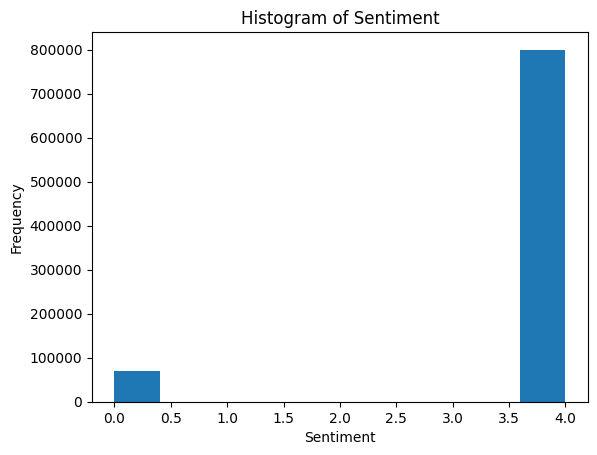

In [157]:
#Check if P and N sentiment has equal representation
import matplotlib.pyplot as plt
plt.hist(corpus['sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment')
plt.show()

In [156]:
#preproces corpus
import string
corpus = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=['sentiment', 'id', 'date', 'flag', 'user', 'text'])

corpus = corpus[['sentiment', 'text']]
corpus = corpus.dropna()
corpus['text'] = corpus['text'].str.lower()
corpus['sentiment'] = corpus['sentiment'].astype(int)
corpus['text'] = corpus['text'].str.translate(str.maketrans('', '', string.punctuation))
print((corpus['sentiment'] == 4).sum())

#make the number of tweets the same for positive and negative
num_negatives = (corpus['sentiment'] == 0).sum()
few_positives = corpus.sample(n=num_negatives, random_state=1)
eq_corpus = pd.concat([few_positives, corpus[corpus['sentiment'] == 0]])
print(eq_corpus)


<ipython-input-156-9a3a227c6be9>:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  corpus = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=['sentiment', 'id', 'date', 'flag', 'user', 'text'])


800000
        sentiment                                               text
527236          4               jeffspi that is hilarious  brilliant
202477          4  buenos dï¿½as cï¿½mo estï¿½s it is a beautiful...
515447          4  annamariapdt you have an amazing voice are you...
730482          4          imma finallaye done with the prelim pprs 
163275          4  ralphp 445  good luck i hope yall are doing we...
...           ...                                                ...
70191           0  sick  spending my day laying in bed listening ...
70192           0                                     gmail is down 
70193           0                       rest in peace farrah so sad 
70194           0  ericurbane sounds like a rival is flagging you...
70195           0  has to resit exams over summer  wishes he work...

[140390 rows x 2 columns]


In [168]:
#from corpus create a lexicon

from collections import Counter


texts = eq_corpus['text'].tolist()
targets = eq_corpus['sentiment'].tolist()

all_text = ' '.join(texts)

words = all_text.lower().split()
word_counts = Counter(words)


positive_counts = Counter()
negative_counts = Counter()
for i, text in enumerate(texts):
    sentiment = targets[i]
    if sentiment == 4:
        positive_counts.update(text.lower().split())
    elif sentiment == 0:
        negative_counts.update(text.lower().split())


lexicon = []
for word, count in word_counts.items():
    lexicon.append({
        'word': word,
        'word count': count,
        'positive word count': positive_counts[word],
        'negative word count': negative_counts[word]
    })

lexicon_df = pd.DataFrame(lexicon)



In [169]:
# Remove stop words from the lexicon
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
lexicon_df = lexicon_df[~lexicon_df['word'].isin(stop_words)]

print(lexicon_df.head(20))

            word  word count  positive word count  negative word count
0        jeffspi           1                    1                    0
3      hilarious         114                   98                   16
4      brilliant          94                   73                   21
5         buenos           6                    6                    0
6         dï¿½as           1                    1                    0
7         cï¿½mo           1                    1                    0
8        estï¿½s           2                    2                    0
11     beautiful         677                  497                  180
12         sunny         371                  229                  142
13       morning        2789                 1643                 1146
16          plan         251                  147                  104
18         start         857                  433                  424
19         study         284                   81                  203
21    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [269]:
#construction of likelihoods
positive = (lexicon_df["positive word count"]+1)/(lexicon_df['word count']+2)
negative = (lexicon_df["negative word count"]+1)/(lexicon_df['word count']+2)
likelihoods = pd.DataFrame({"word":lexicon_df["word"], "positive":positive, "negative":negative})
print(likelihoods.head(20))

print(likelihoods["negative"].sum())
print(likelihoods["positive"].sum())

            word  positive  negative
0        jeffspi  0.666667  0.333333
3      hilarious  0.853448  0.146552
4      brilliant  0.770833  0.229167
5         buenos  0.875000  0.125000
6         dï¿½as  0.666667  0.333333
7         cï¿½mo  0.666667  0.333333
8        estï¿½s  0.750000  0.250000
11     beautiful  0.733432  0.266568
12         sunny  0.616622  0.383378
13       morning  0.589036  0.410964
16          plan  0.584980  0.415020
18         start  0.505239  0.494761
19         study  0.286713  0.713287
21          soon  0.495593  0.504407
22  annamariapdt  0.666667  0.333333
26       amazing  0.748646  0.251354
27         voice  0.335821  0.664179
29     releasing  0.357143  0.642857
30         album  0.615917  0.384083
31          love  0.699222  0.300778
67992.86841450071
69978.13158549929


In [274]:
#create NBC funtion
def nbc(text):
  prior_n = 0.5
  prior_p = 0.5
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.split()
  for word in text:
    try:
      likelihood_n = likelihoods.loc[likelihoods['word'] == word, 'negative'].values[0]
      likelihood_p = likelihoods.loc[likelihoods['word'] == word, 'positive'].values[0]
      posterior_n = (likelihood_n * prior_n)/((likelihood_n * prior_n) + (likelihood_p * prior_p))
      posterior_p = (likelihood_p * prior_p)/(likelihood_n * prior_n + likelihood_p * prior_p)
      prior_n = posterior_n
      prior_p = posterior_p
    except IndexError:
     continue
  return prior_p, prior_n

#test wether there is similar proportion between N and P
for i in range(0,50):
  p += nbc(df.loc[i, 'Text'])[0]
  n += nbc(df.loc[i, 'Text'])[1]
print(n)
print(p)




2.5881665875113473
2.411833412488653


In [295]:
positiv_prob = []
negative_prob = []
for i in range(len(all_tweets)):
  p = nbc(all_tweets.loc[i, 'Text'])[0]
  n = nbc(all_tweets.loc[i, 'Text'])[1]
  positiv_prob.append(p)
  negative_prob.append(n)

print(positiv_prob)
print(negative_prob)
all_tweets['positive_prob'] = positiv_prob
all_tweets['negative_prob'] = negative_prob





[0.051125673030604404, 0.7265808881217637, 0.015785026856136863, 0.3319448459837774, 0.02497291092604443, 0.26659315597198047, 0.12166395469697303, 0.9936153124911006, 0.036648787458214885, 0.8119308207085288, 0.4235592450589926, 0.25721854807255223, 0.0006476623080410468, 0.022825059430473187, 0.0037517311618196613, 0.3308907248364132, 0.024348708463585052, 0.5368371656499297, 0.5383177570093458, 0.13368643811882863, 0.9957772613671049, 0.3107290537855997, 0.22192062529503012, 0.003757544937202678, 0.3511180784690492, 0.0008602630882045715, 0.4054054054054055, 0.3410414395125059, 0.0038088372863048676, 0.44665525228483516, 0.10472969343266458, 0.41519728868283945, 0.3785111799815269, 0.115, 0.44271078543876263, 0.5118895226849418, 0.9727019423640744, 0.48984924848621253, 0.24571015714371736, 0.07252111239002018, 0.056238019412756975, 0.2993030678362408, 0.024531258275786214, 0.1085188689247719, 1.4895340935040139e-05, 0.25131952902963867, 0.5010285101984532, 0.006374179765133133, 0.94

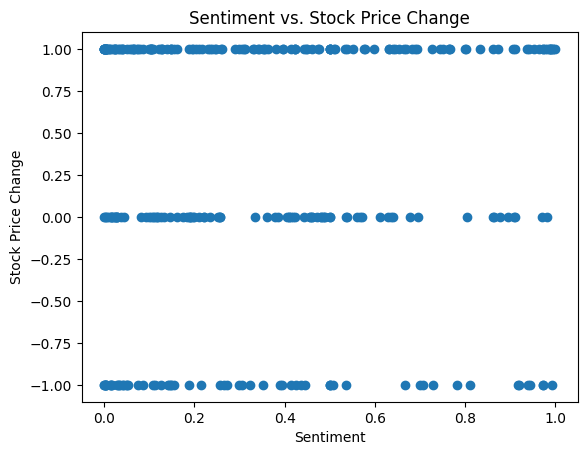

In [307]:
plt.scatter(all_tweets['positive_prob'], all_tweets['Market Sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Stock Price Change')
plt.title('Sentiment vs. Stock Price Change')
plt.show()

In [305]:
import pandas as pd
import statsmodels.api as sm

import statsmodels.api as sm


X = all_tweets['Market Sentiment']
y = all_tweets['positive_prob']

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          positive_prob   R-squared (uncentered):                   0.090
Model:                            OLS   Adj. R-squared (uncentered):              0.087
Method:                 Least Squares   F-statistic:                              29.60
Date:                Sun, 22 Sep 2024   Prob (F-statistic):                    1.11e-07
Time:                        21:07:40   Log-Likelihood:                         -185.04
No. Observations:                 300   AIC:                                      372.1
Df Residuals:                     299   BIC:                                      375.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

This project aimed to explore the relationship between public sentiment expressed on Twitter and Nvidia's stock price fluctuations. By employing a Naive Bayes Classifier (NBC), we successfully gauged public opinion sentiment from tweets related to Nvidia. The analysis revealed a notable correlation between the sentiment derived from tweets and subsequent stock price changes. This suggests that public sentiment, as captured by the NBC model, can be a valuable indicator of market trends and potential stock price movements.

The NBC proved to be an effective tool in analyzing textual data and extracting meaningful insights regarding public sentiment. Its ability to classify tweets into positive and negative categories allowed us to quantify the overall sentiment surrounding Nvidia. The Linear regression p-value (0.00) indicates that there is clear relationship between sentiment and stock price changes since. This underscores the potential of leveraging social media data for market analysis and prediction.

While this project provides a preliminary exploration, further research could delve into refining the sentiment analysis techniques, incorporating a larger dataset, and exploring the impact of different timeframes on the observed relationship. Nevertheless, the findings highlight the potential of harnessing public sentiment analysis, particularly through methods like NBC, to gain valuable insights into market dynamics and inform investment decisions.

